 Step 1.1 – Load and preview the dataset (train.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
df = pd.read_csv('../data/train.csv')
print("Data shape:", df.shape)
df.head()

Data shape: (7049, 31)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


Step 1.2 – Check Column Names (Keypoints)

In [4]:
print("Number of keypoint columns:", len(df.columns) - 1)  # minus 'Image'
print("Keypoint columns:")
print(df.columns[:-1].tolist())

Number of keypoint columns: 30
Keypoint columns:
['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y', 'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y', 'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y']


Step 1.3 – Convert Image String to 96x96

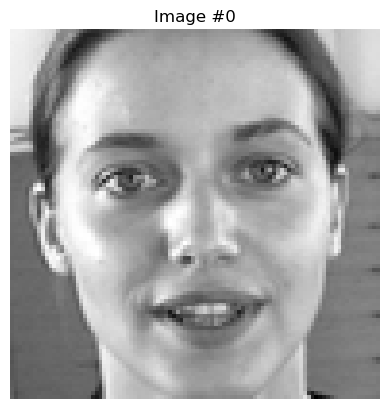

In [5]:
def convert_img_str(img_str):
    return np.array(img_str.split(), dtype='float32').reshape(96, 96)

img0 = convert_img_str(df['Image'][20])

plt.imshow(img0, cmap='gray')
plt.title("Image #0")
plt.axis('off')
plt.show()

Step 1.4 – Show Keypoints Overlay

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9328\1961969393.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = row[i]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9328\1961969393.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = row[i+1]


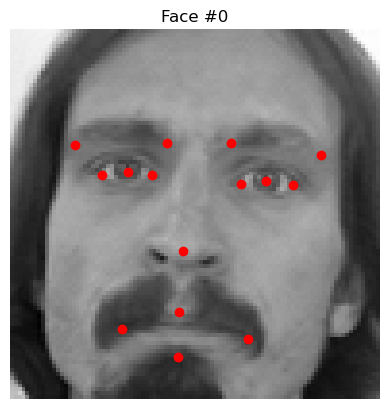

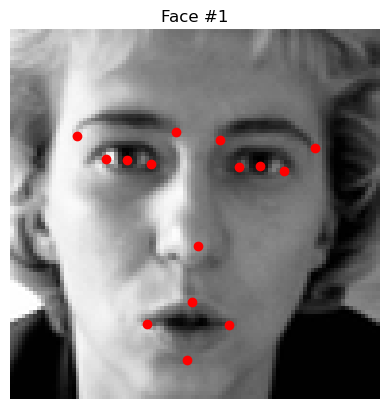

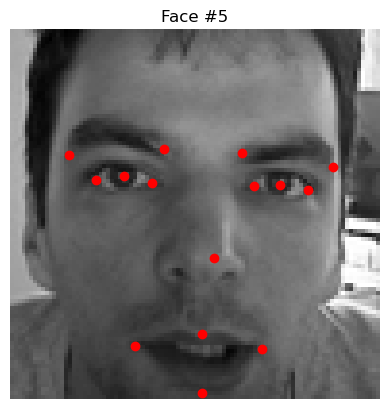

In [4]:
def plot_face_with_keypoints(index):
    row = df.iloc[index]
    img = convert_img_str(row['Image'])

    plt.imshow(img, cmap='gray')
    
    # Plot each (x, y) keypoint
    for i in range(0, 30, 2):  # 15 keypoints (x, y)
        x = row[i]
        y = row[i+1]
        if not pd.isnull(x) and not pd.isnull(y):
            plt.plot(x, y, 'ro')
    
    plt.title(f"Face #{index}")
    plt.axis('off')
    plt.show()

# View a few
plot_face_with_keypoints(0)
plot_face_with_keypoints(1)
plot_face_with_keypoints(5)

Step 1.5 – Missing Keypoints Summary

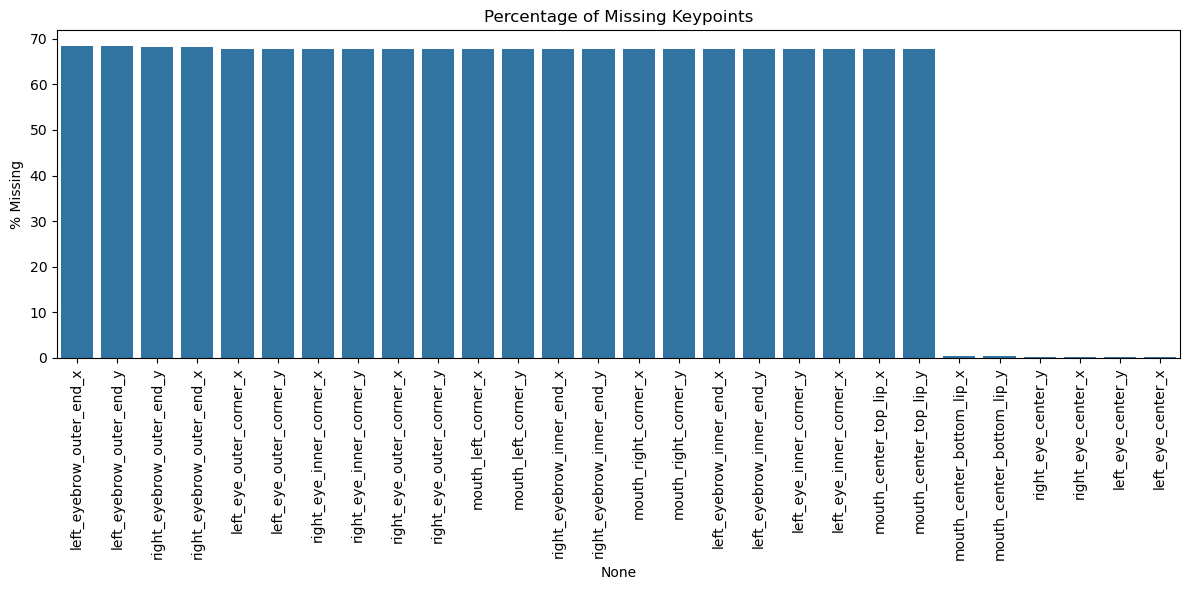

In [7]:
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.xticks(rotation=90)
plt.ylabel('% Missing')
plt.title("Percentage of Missing Keypoints")
plt.tight_layout()
plt.show()